## Linear Regression on Boston Houses Dataset
- Exploratory Analysis

## Section - 1 Exploratory Analysis
- Load
- Analyse
- Visualise
- Normalize

In [29]:
%config Completer.use_jedi=False

In [30]:
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()
X = boston.data
y = boston.target

In [32]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [33]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [34]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [37]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [38]:
# Normalise this dataset
# Each feature must have 0 mean, unit variance
#We are going to find the mean and std dev along every col and normalize the data
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
# print(u.shape,std.shape)

In [39]:
# Normalise the Data
X = (X-u)/std

In [40]:
# Normalised Data
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


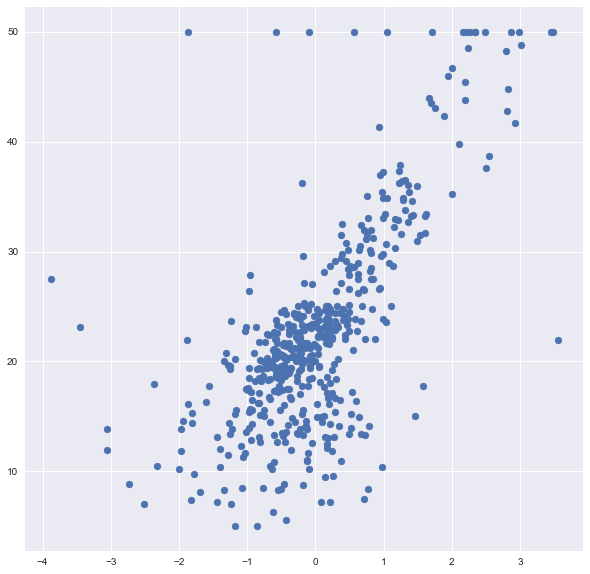

In [41]:
# Plot Y vs any feature
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.style.use('seaborn')
plt.scatter(X[:,5],y)
plt.show()

## Section - 2 Linear Regression on Multiple Features
- Boston Housing Dataset

In [42]:
X.shape, y.shape

((506, 13), (506,))

In [43]:
#Adding X0 parameters which is equal to 1.
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [44]:
# X[:4,:4]

In [16]:
# X - Matrix ( m x n)
# x - Vector (Single Example with n features)
# y - Actual Output Vector 

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

# Error over all examples
def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

#max_epochs=(max_iteration)
def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    #Initalize theta with zero vector
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list

In [17]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  44.054094314575195


## Quite Slow! 18 Seconds! Just 506 examples in the training data!

In [18]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


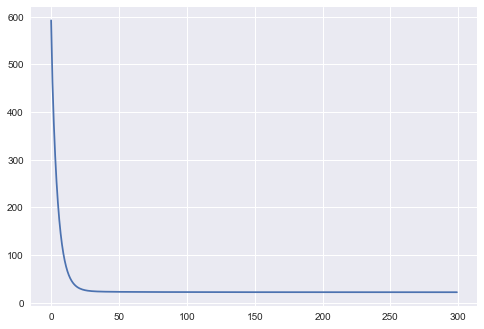

In [19]:
plt.plot(error_list)
plt.show()

## Predictions

In [20]:
y_ = []
for i in range(X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [21]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [22]:
# SCORE
#This is because we have taken the hypothesis function as liner.
#It could have given better result if we would have taken non linear function (Neaural Networks)
r2_score(y,y_)

74.04541323942743

### Section-3 Optimising Code using Vectorization
An Efficent Implemenation for Linear Regression using Vectorization
- Avoid loops in the implemenation, except gradient descent main loop
- Use numpy functions like ```np.sum()```, ```np.dot()``` which are quite fast and already optimised

In [23]:
def hypothesis(X,theta):
    """
        X-m*(n+1);theta=(n+1)*1
        output->a column vector (m*1)
    """
    return np.dot(X,theta)

#Error over all the examples
def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    m=X.shape[0]
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    #Here we are iterating over examples and keeping the features fixed
    #It can be easily understood by the formulae
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [24]:
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.022073984146118164


## Really Very Fast! :D

In [25]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

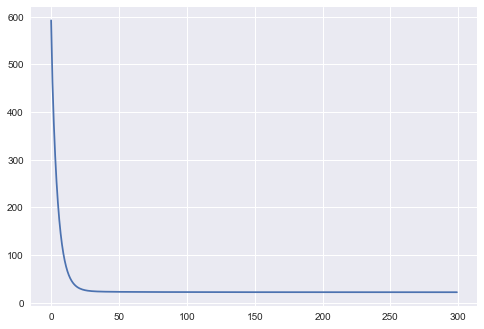

In [26]:
plt.plot(error_list)
plt.show()

In [27]:
## Predictions
y_ = hypothesis(X,theta)
r2_score(y,y_)

74.04541323942742

In [28]:
# The prediction accuracy can be enhanced by using deep learning.